In [1]:
from runner import test_run, TestPlan, TestStep
from pathlib import Path
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Specify Test Plan
Initialize a test plan object which sweeps from 30 to 100% throttle in increments of 10%, holding at each step for 10 seconds

In [2]:
# 1. Create a test plan consisting of steps.
step_duration_ms = 2_000
step_range = np.arange(5, 101, 5)

steps = [
    TestStep(bottom_throttle=i, top_throttle=i, duration_ms=step_duration_ms)
    for i in step_range
]
plan = TestPlan("test", steps=steps)

plan

TestPlan(name='test', steps=[TestStep(duration_ms=2000, top_throttle=5, bottom_throttle=5, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=10, bottom_throttle=10, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=15, bottom_throttle=15, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=20, bottom_throttle=20, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=25, bottom_throttle=25, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=30, bottom_throttle=30, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=35, bottom_throttle=35, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=40, bottom_throttle=40, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=45, bottom_throttle=45, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=50, bottom_throttle=50, pitch_ang

In [3]:
print(plan)

TestPlan(name='test', steps=[TestStep(duration_ms=2000, top_throttle=5, bottom_throttle=5, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=10, bottom_throttle=10, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=15, bottom_throttle=15, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=20, bottom_throttle=20, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=25, bottom_throttle=25, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=30, bottom_throttle=30, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=35, bottom_throttle=35, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=40, bottom_throttle=40, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=45, bottom_throttle=45, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=50, bottom_throttle=50, pitch_ang

### Execute Tests

In [4]:
# Initialize short thrust test to validate propeller mounting direction after changing props
test_duration_ms = 2000
mount_test_throttle = 10
perform_mounting_test = False

mount_test_plan = TestPlan("test", steps=[TestStep(bottom_throttle=mount_test_throttle, top_throttle=mount_test_throttle, duration_ms=test_duration_ms)])

In [5]:
### Execute optional mounting test
if (perform_mounting_test):
    try:
        test_run(filename=None, plan=mount_test_plan)
    except Exception as e:
        print(e)

In [4]:
test_directory = Path("../test_data/coarse_tip_clearance/")

In [145]:
data_dict = {}
files = [
    # "test_1mm_lipo_0.csv",
    "test_1mm_lipo_1.csv",
    # "test_1.5mm_lipo_0.csv",
    "test_1.5mm_lipo_1.csv",
    # "test_3mm_lipo_0.csv",
    "test_3mm_lipo_1.csv",
    # "test_open_lipo_0.csv",
    "test_open_lipo_1.csv",
]

for file in files:
    data_dict[file] = test_run(
        filename=test_directory / file, plan=plan
    )

Loading saved data
Loading saved data
Loading saved data
Loading saved data


### Data Analysis

In [146]:
# Aggregate test data
tip_filename_regex = re.compile(r"test_(\d*\.?\d*)mm")


df_all = pd.concat(
    data_dict.values(),
    keys=[
        (
            file,
            (
                float(match.group(1))
                if (match := tip_filename_regex.match(file))
                else "Open"
            ),
        )
        for file in files
    ],
    names=["test_name", "tip_clearance_mm"],
).sort_index()
df_all

top_motor_rpm  \
test_name             tip_clearance_mm time_ms                    
test_1.5mm_lipo_1.csv 1.5              0.352             1385.0   
                                       4.171                0.0   
                                       8.174                0.0   
                                       12.172               0.0   
                                       16.170               0.0   
...                                                         ...   
test_open_lipo_1.csv  Open             41965.157         1685.0   
                                       41969.161         1628.0   
                                       41973.161         1585.0   
                                       41977.161         1528.0   
                                       41981.150         1457.0   

                                                  bottom_motor_rpm  \
test_name             tip_clearance_mm time_ms                       
test_1.5mm_lipo_1.csv 1.5              0.352                1342.0   
                                       4.171                   0.0   
                                       8.174                   0.0   
                                       12.172                  0.0   
                                       16.170                  0.0   
...                                                            ...   
test_open_lipo_1.csv  Open             41965.157            1571.0   
                                       41969.161            1528.0   
                                       41973.161            1485.0   
                                       41977.161            1428.0   
                                       41981.150            1385.0   

                                                  batt_voltage_V  \
test_name             tip_clearance_mm time_ms                     
test_1.5mm_lipo_1.csv 1.5              0.352              16.527   
                                       4.171              16.569   
                                       8.174              16.548   
                                       12.172             16.569   
                                       16.170             16.548   
...                                                          ...   
test_open_lipo_1.csv  Open             41965.157          15.813   
                                       41969.161          15.834   
                                       41973.161          15.771   
                                       41977.161          15.792   
                                       41981.150          15.813   

                                                  batt_current_A  \
test_name             tip_clearance_mm time_ms                     
test_1.5mm_lipo_1.csv 1.5              0.352               10.24   
                                       4.171               10.24   
                                       8.174               10.24   
                                       12.172              10.24   
                                       16.170              10.24   
...                                                          ...   
test_open_lipo_1.csv  Open             41965.157           10.24   
                                       41969.161           10.24   
                                       41973.161           10.24   
                                       41977.161           10.24   
                                       41981.150           10.24   

                                                  top_current_A  \
test_name             tip_clearance_mm time_ms                    
test_1.5mm_lipo_1.csv 1.5              0.352            0.07270   
                                       4.171            0.13086   
                                       8.174            0.18902   
                                       12.172           0.14540   
                                       16.170           0.21810   
...                         

In [147]:
# Generate buckets for averaging based on step duration defined in testing
transient_offset_ms = (
    500  # Ignore first 500 ms of each throttle step to allow transients to settle
)
stable_step_duration_ms = step_duration_ms - transient_offset_ms
step_start_times = np.arange(len(step_range)) * step_duration_ms


# Aggregate data for each throttle step
df_steps = (
    pd.concat(
        [
            df_all.loc[
                (
                    slice(None),
                    slice(None),
                    slice(
                        t_start + transient_offset_ms,
                        t_start + transient_offset_ms + stable_step_duration_ms,
                    ),
                ),
                :,
            ]
            for t_start in step_start_times
        ],
        keys=step_range,
        names=["throttle"],
    )
    .groupby(["test_name", "tip_clearance_mm", "throttle"])
    .agg(["mean", "std"])
)

df_steps

top_motor_rpm              \
                                                         mean         std   
test_name             tip_clearance_mm throttle                             
test_1.5mm_lipo_1.csv 1.5              5          1726.064000    9.254059   
                                       10         3090.946667   20.205028   
                                       15         4340.826667   36.579330   
                                       20         5548.493333   60.221688   
                                       25         6706.960000   49.072259   
...                                                       ...         ...   
test_open_lipo_1.csv  Open             80        15740.933333  121.488928   
                                       85        16245.597333  139.671867   
                                       90        16770.757333  114.952710   
                                       95        17279.109333   93.300253   
                                       100       17599.480000  144.272929   

                                                bottom_motor_rpm              \
                                                            mean         std   
test_name             tip_clearance_mm throttle                                
test_1.5mm_lipo_1.csv 1.5              5             1735.794667   29.811762   
                                       10            3108.816000   28.050771   
                                       15            4388.960000   42.944511   
                                       20            5696.050667   46.502373   
                                       25            6832.672000   49.291414   
...                                                          ...         ...   
test_open_lipo_1.csv  Open             80           15400.824000  114.595923   
                                       85           15964.562667  124.277767   
                                       90           16507.453333   97.002687   
                                       95           16903.565333   85.997826   
                                       100          17317.861333   83.952093   

                                                batt_voltage_V            \
                                                          mean       std   
test_name             tip_clearance_mm throttle                            
test_1.5mm_lipo_1.csv 1.5              5             16.535064  0.024152   
                                       10            16.516304  0.024274   
                                       15            16.492225  0.019076   
                                       20            16.447873  0.030460   
                                       25            16.392823  0.022653   
...                                                        ...       ...   
test_open_lipo_1.csv  Open             80            14.834400  0.031322   
                                       85            14.551264  0.028574   
                                       90            14.309848  0.031311   
                                       95            14.032648  0.074052   
                                       100           13.760208  0.014321   

                                                batt_current_A            \
                                                          mean       std   
test_name             tip_clearance_mm throttle                            
test_1.5mm_lipo_1.csv 1.5              5             10.240000  0.000000   
                                       10            10.240000  0.000000   
                                       15            10.240000  0.000000   
                                       20            10.240000  0.000000   
                                       25            10.240000  0.000000   
...                                                        ...       ...   
test_open_lipo_1.csv  Open             80            40.510080  1.558071   
                       

In [148]:
thrust_mean_g = df_steps["thrust_N"]["mean"] / 9.81 * 1e3
thrust_g_err = df_steps["thrust_N"]["std"] / 9.81 * 1e3

hall_current_mean = df_steps["top_current_A"]["mean"] + df_steps["bottom_current_A"]["mean"]
hall_current_rel_err = (0.02294 * hall_current_mean + 0.3734) / hall_current_mean # Constants from calibration fit error

batt_voltage_mean = df_steps["batt_voltage_V"]["mean"]
batt_voltage_rel_err = df_steps["batt_voltage_V"]["std"] / batt_voltage_mean

shunt_current_mean = df_steps["batt_current_A"]["mean"]
shunt_power_mean = shunt_current_mean * batt_voltage_mean

batt_power_mean = hall_current_mean * batt_voltage_mean
batt_power_rel_err = np.sqrt(hall_current_rel_err**2 + batt_voltage_rel_err**2)

thrust_power_rel_err = np.sqrt((thrust_g_err / thrust_mean_g)**2 + batt_power_rel_err**2)
thrust_mean_g = thrust_mean_g * (thrust_mean_g > 0)

rpm_avg = 0.5*(df_steps["top_motor_rpm"]["mean"] + df_steps["bottom_motor_rpm"]["mean"])

df_thrust_power = pd.DataFrame(
    {
        "rpm_avg": rpm_avg,
        "thrust_mean_g": thrust_mean_g,
        "batt_power_mean": batt_power_mean,
        "batt_voltage_mean": batt_voltage_mean,
        "hall_current_mean": hall_current_mean,
        "shunt_power_mean": shunt_power_mean,
        "thrust_power_g_W": thrust_mean_g / batt_power_mean,
        "shunt_thrust_power_g_W": thrust_mean_g / shunt_power_mean,
        "batt_power_err": np.abs(batt_power_rel_err * batt_power_mean),
        "thrust_g_err": thrust_g_err,
        "thrust_power_err": thrust_power_rel_err * (thrust_mean_g / batt_power_mean)
    }
)

In [149]:
df_thrust_power

rpm_avg  thrust_mean_g  \
test_name             tip_clearance_mm throttle                                
test_1.5mm_lipo_1.csv 1.5              5          1730.929333       4.305338   
                                       10         3099.881333       4.630077   
                                       15         4364.893333      10.461568   
                                       20         5622.272000      64.173482   
                                       25         6769.816000     124.072094   
...                                                       ...            ...   
test_open_lipo_1.csv  Open             80        15570.878667    1557.770689   
                                       85        16105.080000    1667.201676   
                                       90        16639.105333    1768.659411   
                                       95        17091.337333    1867.151707   
                                       100       17458.670667    1951.939255   

                                                 batt_power_mean  \
test_name             tip_clearance_mm throttle                    
test_1.5mm_lipo_1.csv 1.5              5                1.742774   
                                       10               5.709882   
                                       15              11.830431   
                                       20              19.719895   
                                       25              28.448475   
...                                                          ...   
test_open_lipo_1.csv  Open             80             514.900085   
                                       85             579.355669   
                                       90             641.932212   
                                       95             709.187184   
                                       100            760.034095   

                                                 batt_voltage_mean  \
test_name             tip_clearance_mm throttle                      
test_1.5mm_lipo_1.csv 1.5              5                 16.535064   
                                       10                16.516304   
                                       15                16.492225   
                                       20                16.447873   
                                       25                16.392823   
...                                                            ...   
test_open_lipo_1.csv  Open             80                14.834400   
                                       85                14.551264   
                                       90                14.309848   
                                       95                14.032648   
                                       100               13.760208   

                                                 hall_current_mean  \
test_name             tip_clearance_mm throttle                      
test_1.5mm_lipo_1.csv 1.5              5                  0.105399   
                                       10                 0.345712   
                                       15                 0.717334   
                                       20                 1.198933   
                                       25                 1.735423   
...                                                            ...   
test_open_lipo_1.csv  Open             80                34.709869   
                                       85                39.814800   
                                       90                44.859471   
                                       95                50.538372   
                                       100               55.234201   

                                                 shunt_power_mean  \
test_name             tip_clearance_mm throttle                     
test_1.5mm_lipo_1.csv 1.5              5               169.319057   
                                       10              169.126957   
                              

In [150]:
df_thrust_power_agg = df_thrust_power[(df_thrust_power.index.get_level_values('throttle') >= 40)]
df_thrust_power_agg

rpm_avg  thrust_mean_g  \
test_name             tip_clearance_mm throttle                                
test_1.5mm_lipo_1.csv 1.5              40         9943.069333     381.084147   
                                       45        10993.366667     470.661235   
                                       50        11822.032000     573.855857   
                                       55        12673.801333     659.516327   
                                       60        13525.417333     769.696533   
                                       65        14417.124000     871.655360   
                                       70        15199.200000     980.448900   
                                       75        15883.093333    1080.553289   
                                       80        16559.788000    1185.429410   
                                       85        17309.848000    1282.279121   
                                       90        17953.621333    1377.481701   
                                       95        18485.409333    1472.737424   
                                       100       18988.477333    1553.705977   
test_1mm_lipo_1.csv   1.0              40        10122.792000     439.799339   
                                       45        11165.358667     560.294733   
                                       50        12028.336000     654.543725   
                                       55        12900.788000     772.228384   
                                       60        13780.972000     894.844935   
                                       65        14659.974667    1011.851519   
                                       70        15435.930667    1127.469887   
                                       75        16119.942667    1239.109724   
                                       80        16876.384000    1349.009262   
                                       85        17460.872000    1447.086375   
                                       90        18166.573333    1557.837666   
                                       95        18723.476000    1663.144966   
                                       100       19216.457333    1750.268564   
test_3mm_lipo_1.csv   3.0              40        10032.065333     389.572484   
                                       45        11102.494667     462.810828   
                                       50        11969.249333     547.415803   
                                       55        12819.060000     634.794148   
                                       60        13744.632000     727.698250   
                                       65        14610.942667     822.547895   
                                       70        15428.965333     918.861410   
                                       75        16149.557333    1003.010758   
                                       80        16929.021333    1088.235151   
                                       85        17617.733333    1182.457495   
                                       90        18260.437333    1289.664820   
                                       95        18946.026667    1375.602242   
                                       100       19490.132000    1456.434886   
test_open_lipo_1.csv  Open             40         9617.620000     571.520519   
                                       45        10603.052000     698.546170   
                                       50        11427.249333     828.447243   
                                       55        12137.692000     933.315414   
                                       60        12981.818667    1066.195038   
                                       65        13721.994667    1191.978770   
                                       70        14398.830667    1313.840759   
                                       75        15020.946667    1440.319460   
                                       80        15570.878667    1557.770689   
                                       85        16105

In [151]:
plt.plot(figsize=(16,10))
plt.errorbar(x="batt_power_mean", y="thrust_mean_g", x data=df_thrust_power_agg)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3390479961.py, line 2)

In [152]:
# Set nominal required thrust constants. Used as a benchmark to define region of interest for our data.
hover_thrust_g = 750
payload_thrust_g = 1200

# My Stuff

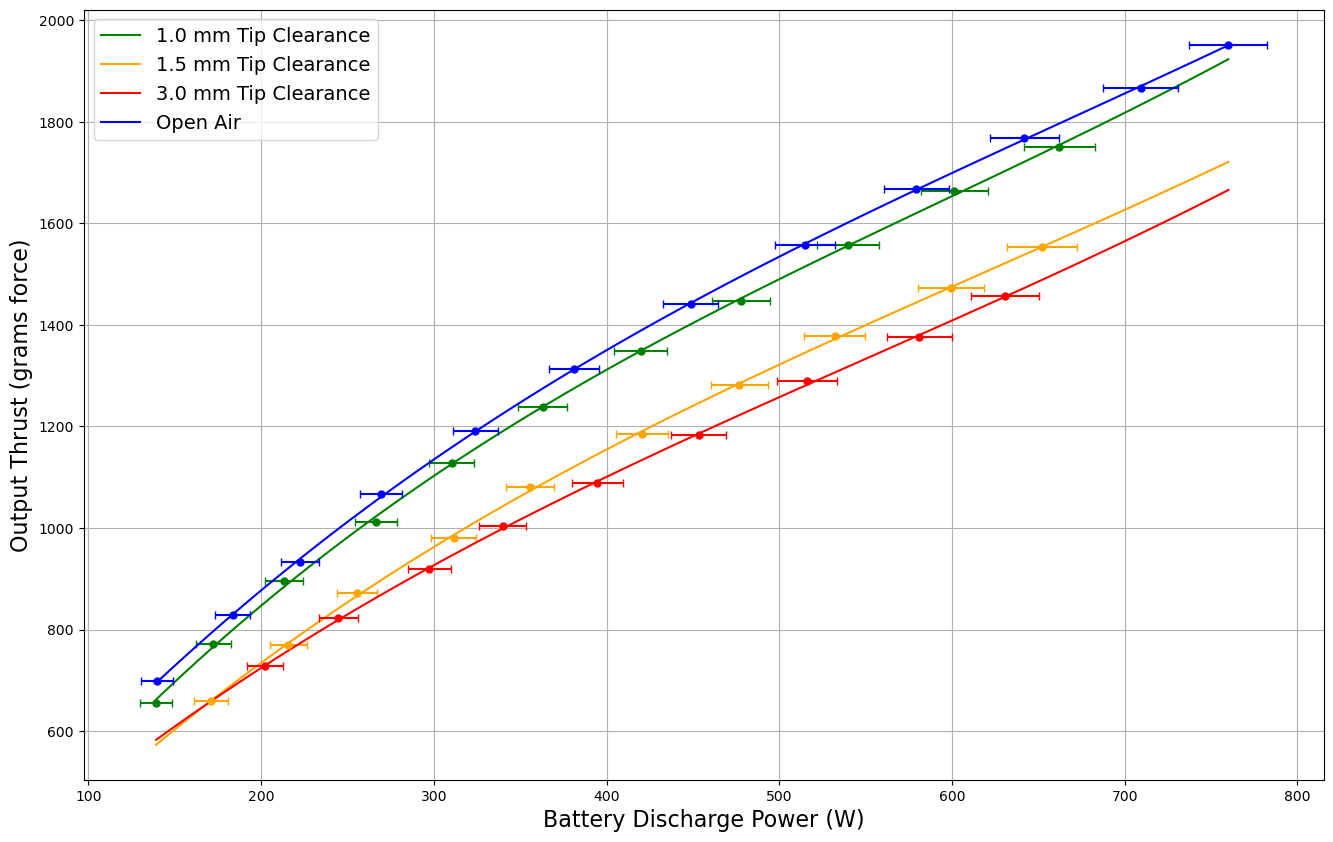

In [155]:
import numpy as np

DEGREE = 3
N = 100
min_thrust = hover_thrust_g - 110
max_thrust = payload_thrust_g - 75

x_label = "batt_power_mean"
y_label = "thrust_mean_g"
err_label = "batt_power_err"
x_min = 1e9
x_max = -1e9

def extract_roi(grp, x_label, ylabel, min_thrust, max_thrust):
    grp = grp[grp["thrust_mean_g"] > min_thrust]
    grp = grp.sort_values("thrust_mean_g")
    x = grp[x_label].to_numpy()
    y = grp[y_label].to_numpy()
    err = grp[err_label].to_numpy()
    return x, y, err

plt.figure(figsize=(16, 10))

# Analyze data.
for n, grp in df_thrust_power.groupby("tip_clearance_mm"):
    x, y, err = extract_roi(grp, x_label, y_label, min_thrust, max_thrust)
    x_min = min(x_min, min(x))
    x_max = max(x_max, max(x))

x_dense = np.linspace(x_min, x_max, N)


color_dict = {
    '1.0': 'g',
    '1.5': 'orange',
    '3.0': 'r',
    'Open': 'b'
}

# Plot inerpolation.
for n, grp in df_thrust_power.groupby("tip_clearance_mm"):
    x, y, err = extract_roi(grp, x_label, y_label, min_thrust, max_thrust)
    coeffs = np.polyfit(x, y, DEGREE)
    poly = np.poly1d(coeffs)
    legend_label = str(n) + " mm Tip Clearance"
    
    if (n == 'Open'): 
        y_open = y
        legend_label = "Open Air"

    if (n == 1.0):
        y_1mm = y

    plt.plot(x_dense, poly(x_dense), label=legend_label, color=color_dict[str(n)])
    plt.errorbar(x, y, xerr=err, fmt='o', capsize=3, markersize=5, color=color_dict[str(n)])

plt.xlabel("Battery Discharge Power (W)", fontsize=16)
plt.ylabel("Output Thrust (grams force)", fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()

In [165]:
1350/1300

1.0384615384615385